# Coast Evolution

## Load data

In [6]:
import pandas as pd

# Read the .xyz file (space or tab delimited)
df = pd.read_csv('data/06_tx_1965-2023_jrk.xyz', delim_whitespace=True, names=['x', 'y', 'z'])

df

C:\Users\Move\AppData\Local\Temp\ipykernel_6484\3245929879.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('data/06_tx_1965-2023_jrk.xyz', delim_whitespace=True, names=['x', 'y', 'z'])
C:\Users\Move\AppData\Local\Temp\ipykernel_6484\3245929879.py:4: DtypeWarning: Columns (0,1,2,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/06_tx_1965-2023_jrk.xyz', delim_whitespace=True, names=['x', 'y', 'z'])


,,x,y,z
X,Y,Z,T,loc
109682.41,558181.19,3.77,5-8-1965,900
109677.53,558180.09,3.63,5-8-1965,900
109672.65,558179.00,3.55,5-8-1965,900
109667.77,558177.91,3.41,5-8-1965,900
...,...,...,...,...
117558.08,579018.26,-1.44,3-4-2023,3081
117551.46,579025.77,-1.7,3-4-2023,3081
117544.85,579033.27,-1.88,3-4-2023,3081
117538.24,579040.77,-2.14,3-4-2023,3081


In [4]:
# print shape and info
print(df.shape)
print(df.info())

(1380684, 3)
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1380684 entries, ('X', 'Y') to (117531.63, 579048.27)
Data columns (total 3 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   x       1380684 non-null  object
 1   y       1380684 non-null  object
 2   z       1380684 non-null  object
dtypes: object(3)
memory usage: 51.9+ MB
None


## Preprocess the data

In [7]:
# remove column names and use the first row as headers
df.columns = df.iloc[0]
df = df[1:]

In [8]:
df

,"(X, Y)",Z,T,loc
109682.41,558181.19,3.77,5-8-1965,900
109677.53,558180.09,3.63,5-8-1965,900
109672.65,558179.00,3.55,5-8-1965,900
109667.77,558177.91,3.41,5-8-1965,900
109662.89,558176.82,3.16,5-8-1965,900
...,...,...,...,...
117558.08,579018.26,-1.44,3-4-2023,3081
117551.46,579025.77,-1.7,3-4-2023,3081
117544.85,579033.27,-1.88,3-4-2023,3081
117538.24,579040.77,-2.14,3-4-2023,3081


In [10]:
df.columns

Index(['Z', 'T', 'loc'], dtype='object', name=('X', 'Y'))

In [12]:
df.index

MultiIndex([('109682.41', '558181.19'),
            ('109677.53', '558180.09'),
            ('109672.65', '558179.00'),
            ('109667.77', '558177.91'),
            ('109662.89', '558176.82'),
            ('109658.01', '558175.73'),
            ('109653.13', '558174.64'),
            ('109648.25', '558173.55'),
            ('109643.37', '558172.46'),
            ('109638.49', '558171.37'),
            ...
            (  117591.14,   578980.76),
            (  117584.53,   578988.26),
            (  117577.92,   578995.76),
            (   117571.3,   579003.26),
            (  117564.69,   579010.76),
            (  117558.08,   579018.26),
            (  117551.46,   579025.77),
            (  117544.85,   579033.27),
            (  117538.24,   579040.77),
            (  117531.63,   579048.27)],
           length=1380683)

In [13]:
# find number of rows with similar x and y values (index)
df.index.value_counts()

117800.0   576066.0     84
109573.0   559111.0     80
117605.84  576207.07    43
116490.67  575776.5     43
116965.19  575443.0     43
                        ..
115487.11  572804.09     1
115487.13  570325.22     1
115487.16  570432.3      1
115487.18  572565.5      1
119251.04  577097.98     1
Name: count, Length: 116708, dtype: int64

In [23]:
# create df_xyz that splits the index into x and y columns
df_xyz = df.reset_index()

# handle different possible column names created by reset_index()
if 'index' in df_xyz.columns:
	# index column contains tuples like (x, y)
	df_xyz[['x', 'y']] = pd.DataFrame(df_xyz['index'].tolist(), index=df_xyz.index)
	df_xyz = df_xyz.drop(columns=['index'])
elif 'level_0' in df_xyz.columns and 'level_1' in df_xyz.columns:
	# common names when resetting a MultiIndex without names
	df_xyz = df_xyz.rename(columns={'level_0': 'X', 'level_1': 'Y'})
else:
	# fallback: assume the first two columns are the index levels (coming from reset_index)
	first_two = list(df_xyz.columns[:2])
	df_xyz = df_xyz.rename(columns={first_two[0]: 'X', first_two[1]: 'Y'})

df_xyz

"(X, Y)",X,Y,Z,T,loc
0,109682.41,558181.19,3.77,5-8-1965,900
1,109677.53,558180.09,3.63,5-8-1965,900
2,109672.65,558179.00,3.55,5-8-1965,900
3,109667.77,558177.91,3.41,5-8-1965,900
4,109662.89,558176.82,3.16,5-8-1965,900
...,...,...,...,...,...
1380678,117558.08,579018.26,-1.44,3-4-2023,3081
1380679,117551.46,579025.77,-1.7,3-4-2023,3081
1380680,117544.85,579033.27,-1.88,3-4-2023,3081
1380681,117538.24,579040.77,-2.14,3-4-2023,3081


In [19]:
df_xyz.iloc[0]

(X, Y)
X      109682.41
Y      558181.19
Z           3.77
T       5-8-1965
loc          900
Name: 0, dtype: object

In [25]:
# type of data in df_xyz
df_xyz.dtypes

(X, Y)
X      object
Y      object
Z      object
T      object
loc    object
dtype: object

In [27]:
# access data by collection date (T) when 'T' = 5-8-1965
df_xyz[df_xyz['T'] == '5-8-1965']

"(X, Y)",X,Y,Z,T,loc
0,109682.41,558181.19,3.77,5-8-1965,900
1,109677.53,558180.09,3.63,5-8-1965,900
2,109672.65,558179.00,3.55,5-8-1965,900
3,109667.77,558177.91,3.41,5-8-1965,900
4,109662.89,558176.82,3.16,5-8-1965,900
...,...,...,...,...,...
7348,118417.78,578043.12,-3.50,5-8-1965,3081
7349,118404.56,578058.12,-3.60,5-8-1965,3081
7350,118391.33,578073.12,-3.60,5-8-1965,3081
7351,118378.10,578088.13,-3.60,5-8-1965,3081


## Visualize data

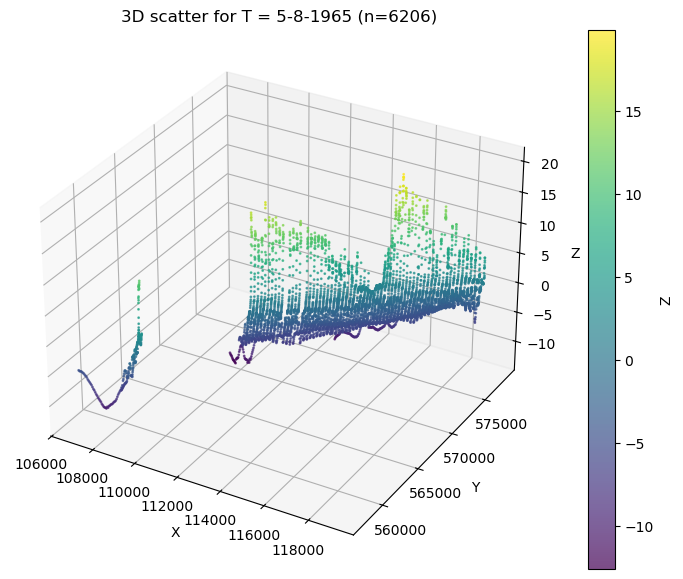

In [29]:
# visualize X Y Z data in 3D scatter plot for the selected time T
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401

# filter by time (uses existing variable T)
sel = df_xyz[df_xyz['T'] == T].copy()

if sel.empty:
    print(f"No rows for T = {T}")
else:
    # ensure numeric types, drop rows that can't be converted
    sel[['X', 'Y', 'Z']] = sel[['X', 'Y', 'Z']].apply(pd.to_numeric, errors='coerce')
    sel = sel.dropna(subset=['X', 'Y', 'Z'])

    # downsample if very large for interactive plotting
    max_points = 200000
    if len(sel) > max_points:
        sel = sel.sample(max_points, random_state=1)

    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    sc = ax.scatter(sel['X'], sel['Y'], sel['Z'], c=sel['Z'], cmap='viridis', s=1, alpha=0.7)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(f'3D scatter for T = {T} (n={len(sel)})')
    fig.colorbar(sc, ax=ax, label='Z')
    plt.show()